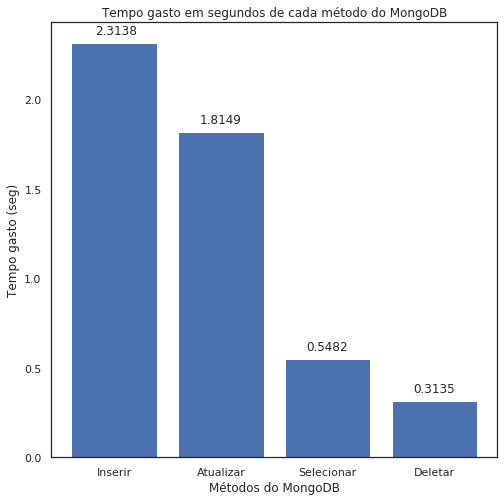

In [1]:
from pymongo import MongoClient
import pandas as pd
import time

#fonte: https://www.w3schools.com/python/python_mongodb_getstarted.asp

cliente = MongoClient('localhost', 27017)
cliente = MongoClient('mongodb://localhost:27017/')


banco_mongo = cliente["nosqldb"]
mycollection = banco_mongo['cursos_prouni']


# INSERCAO
def csv_to_json(cursos_prouni, header=None):
#convertendo a planilha de csv pra json
    data = pd.read_csv(cursos_prouni, header=header)
    return data.to_dict('records')
    
inicio_insercao = time.time()
    
#inserindo os dados na colection
inseridos = mycollection.insert_many(csv_to_json('../cursos-prouni.csv', header=0))
    
fim_insercao = time.time()

#calculando o tempo que levou pra inserir os dados
dif_insercao = fim_insercao-inicio_insercao
    
               
#ATUALIZAR
#criando queries para atualizar bolsa_integral_cotas onde os valores forem maiores ou iguais que zero
myquery_bolsa_int = { "bolsa_integral_cotas": {"$gte": 0 } }
novos_valores_bolsas_int = { "$set":{"bolsa_integral_cotas": 30} } 
    
#criandoqueries para atualizar bolsa_parcial_cotas onde os valores forem maiores ou iguais a zero
myquery_bolsa_parc = { "bolsa_parcial_cotas": {"$gte": 0 } }
novos_valores_bolsas_parc = { "$set": {"bolsa_parcial_cotas": 40} } 

#criando as queries pra alterar os valores das notas de ampla conc integral onde os valores forem maior que zero
myquery_notas_integral_ampla = {"nota_integral_ampla":{"$gt": 0}}
novos_valores_integral_ampla = {"$mul":{"nota_integral_ampla": 1.05}}

#criando as queries pra alterar os valores das notas de ampla conc parcial
myquery_notas_parcial_ampla = {"nota_parcial_ampla":{"$gt": 0}}
novos_valores_parcial_ampla = {"$mul":{"nota_parcial_ampla": .95}}

#criando as queries pra alterar os valores das mensalidades onde os valores forem maior que zero
myquery_mensalidade = {"mensalidade":{"$gt": 0 }}
novos_valores_mensalidade = {"$mul":{"mensalidade": 1.05}}

#criando queries cidade_busca, mudando o nome das cidades que começam com S
myquery_cidade_busca = { "cidade_busca": { "$regex": "^S" } }
novos_valores_cidade_busca = { "$set": { "cidade_busca": "Timóteo" } }

#criando queries para atualizar o nome da instituição
myquery_universidade_nome = {"universidade_nome":{"$regex": "^U"}}
novos_valores_universidade_nome = { "$set": { "universidade_nome": "CEFET" } }

inicio_atualizar = time.time()
    
#atualizando bolsas de cotas integrais e parciais
atualiza_cotas_integrais = mycollection.update_many(myquery_bolsa_int,novos_valores_bolsas_int)
atualiza_cotas_parciais = mycollection.update_many(myquery_bolsa_parc,novos_valores_bolsas_parc)
    
    
#atualizando notas de ampla conc integral
atualizacao_notas_int_ampla = mycollection.update_many(myquery_notas_integral_ampla,novos_valores_integral_ampla)
    
#atualizando notas de ampla conc parcial
atualizacao_notas_parc_ampla = mycollection.update_many(myquery_notas_parcial_ampla,novos_valores_parcial_ampla)
    
    
#atualizando valores de mensalidade
atualizacao_mensalidade = mycollection.update_many(myquery_mensalidade, novos_valores_mensalidade)
    
#atualizando valores de cidade_busca
atualizacao_cidade_busca = mycollection.update_many(myquery_cidade_busca,novos_valores_cidade_busca)
    
    
#atualizando valores universidade_nome
atualizacao_universidade_nome = mycollection.update_many(myquery_universidade_nome,novos_valores_universidade_nome)
    
fim_atualizar = time.time()
    
#calculando o tempo gasto para atualizar os dados
dif_atualizar = fim_atualizar-inicio_atualizar


#LEITURA
inicio_leitura = time.time()
#buscando toda as referencias
for dados in mycollection.find():           
    fim_leitura = time.time()
#calculando o tempo que levou pra retornar  os dados do banco
dif_leitura = fim_leitura-inicio_leitura
    
        
#DELETAR
inicio_deletar = time.time()
delet = mycollection.delete_many({})
fim_deletar = time.time()
dif_deletar = fim_deletar - inicio_deletar


#Plotando grafico
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set(style="white")
%matplotlib inline

x = ['Inserir','Atualizar','Selecionar', 'Deletar']
y = [dif_insercao, dif_atualizar, dif_leitura,  dif_deletar]

p = plt.figure(figsize=(8, 8))
plt.bar(x, y, label = 'Barras')
plt.xlabel('Métodos do MongoDB')
plt.ylabel('Tempo gasto (seg)')
plt.title('Tempo gasto em segundos de cada método do MongoDB')

eixoX = [0.32, 1.3, 2.3, 3.3]
eixoY = [dif_insercao, dif_atualizar, dif_leitura, dif_deletar]
for i in range(len(eixoX)):
    plt.text(x = eixoX[i]-0.5 , y = eixoY[i]+0.05, s = round(eixoY[i], 4), size = 12)

plt.show()

p.savefig('graficoTempoMongoDB.png', format='png')